In [1]:
import pandas as pd 
import numpy as np 
df = pd.read_csv('data.csv')
#print(df.head(2))
print(df.info())
df.drop("Unnamed: 32",axis=1,inplace = True)
#Now we know that there is no use of id's so we can drop it.
df.drop("id",inplace=True, axis=1)
#print(df.head(2))
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [2]:
features_mean = list(df.columns[1:11])
features_se = list(df.columns[11:21])
features_worst = list(df.columns[21:31])
print(features_mean)
print(features_se)
print(features_worst)


['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']
['radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se']
['radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


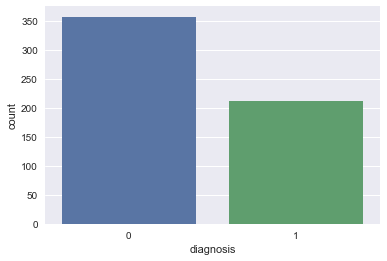

In [3]:
df.loc[df['diagnosis']=='M','diagnosis']=1
df.loc[df['diagnosis']=='B','diagnosis']=0
#print (df.head(2))
import seaborn as sns
%matplotlib inline
sns.countplot(df['diagnosis'], label="Count")

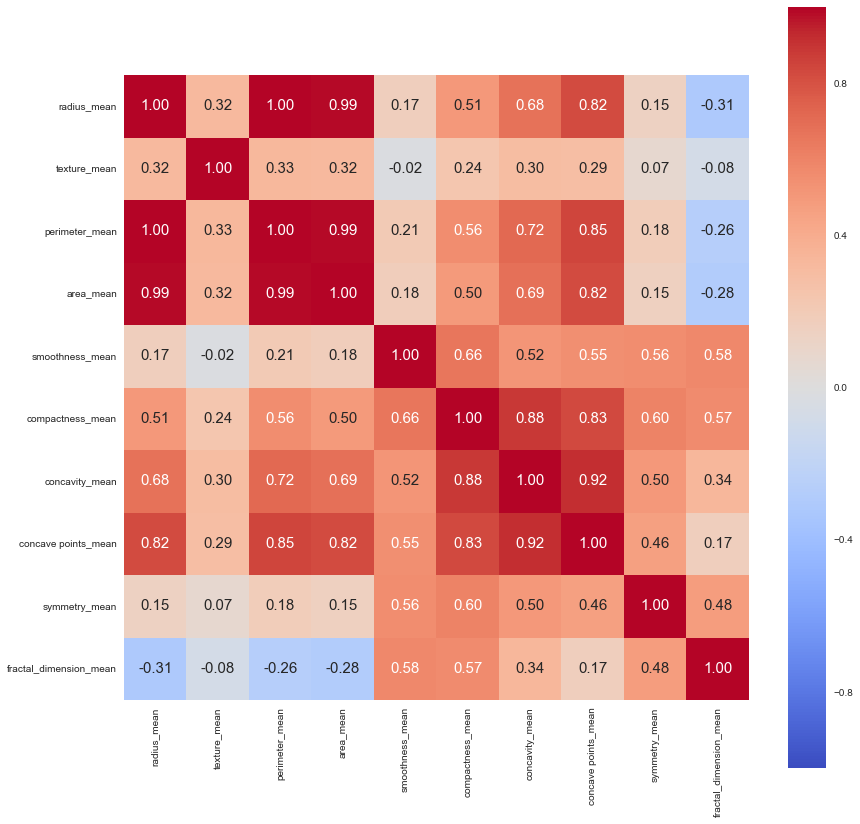

In [4]:
#Now one of the most important concept is Correlation map, so that we can remove muti colinearity that is why to use same fature again and
#again
#lets check the correlation between features
corr = df[features_mean].corr() # .corr() is used to find correlation.
import matplotlib.pyplot as plt 
plt.figure(figsize=(14,14))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= features_mean, yticklabels= features_mean,
           cmap= 'coolwarm')

In [9]:
prediction_var = ['radius_mean','texture_mean','smoothness_mean','compactness_mean','symmetry_mean']
from sklearn.model_selection import train_test_split # to split the data into two parts
train, test = train_test_split(df, test_size = 0.3)
#print(type(train))
#print(type(test))
print(train.shape)
print(test.shape)
train_X = train[prediction_var]
train_y = list(train['diagnosis'])
#Same we have to create for test dataset
test_X = test[prediction_var]
test_y = list(test['diagnosis']) # I am using list because pandas 


(398, 31)
(171, 31)


In [10]:
from sklearn.ensemble import RandomForestClassifier # for random forest classifier
from sklearn import metrics 
model = RandomForestClassifier(n_estimators=100)# a simple random forest model
model.fit(train_X,train_y)# now fit our model for traiing data
prediction=model.predict(test_X)
print(metrics.accuracy_score(prediction,test_y)) 




0.929824561404


In [12]:
#Now lets look at the accuracy by passing all the features.
trainX = train[features_mean]
testX = test[features_mean]
model.fit(trainX,train_y)
prediction=model.predict(testX)
print(metrics.accuracy_score(prediction,test_y))
#So we found that accuracy is almost similar. Now lets change the algorithm. 

0.923976608187


In [17]:
from sklearn.linear_model import LogisticRegression 
log=LogisticRegression(penalty='l2',C=1)
log.fit(train_X,train_y)
accuracy1 = log.score(test_X,test_y)
print("Accuracy when we use Logistic Regression Classifier when we are using it after reducing the no of features:", accuracy1)
log.fit(trainX,train_y)
accuracy2 = log.score(testX,test_y)
print("Accuracy when we use Logistic Regression Classifier when we are using it with all the features:", accuracy2)
#Now here we found that accuracy increases from 86.5% to 89.4% when we use all the features so reducing the features and using 
#logistic classifier is a bad practice.

Accuracy when we use Logistic Regression Classifier when we are using it after reducing the no of features: 0.865497076023
Accuracy when we use Logistic Regression Classifier when we are using it with all the features: 0.894736842105


In [20]:
# Now lets check the important features of our model.
trainX = train[features_mean]
testX = test[features_mean]
model = RandomForestClassifier(n_estimators=100)
model.fit(trainX,train_y)
prediction=model.predict(testX)
featimp = pd.Series(model.feature_importances_, index=features_mean).sort_values(ascending=False)
print(featimp)




concave points_mean       0.236849
perimeter_mean            0.200940
area_mean                 0.158882
concavity_mean            0.140395
radius_mean               0.102037
texture_mean              0.056966
compactness_mean          0.040845
smoothness_mean           0.024348
fractal_dimension_mean    0.020565
symmetry_mean             0.018175
dtype: float64


In [23]:
# Now lets use only first 5 of these important features in Logistic Regression.
important_features = ['concave points_mean','perimeter_mean','area_mean','concavity_mean','radius_mean']
train_imp = train[important_features]
test_imp = test[important_features]
log.fit(train_imp,train_y)
accuracy1 = log.score(test_imp,test_y)
print("Accuracy when we use Logistic Regression Classifier with important features:", accuracy1)
# So again we notice that reducing here the no of features is not a good practice.

Accuracy when we use Logistic Regression Classifier with important features: 0.87134502924
